# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
!pip install pytorch_tabular[extra]

You should consider upgrading via the 'c:\users\joann\coding projects\ipynb dump\ipynb-dump\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
SEED = 42


import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

train_df = df[df['year'] <= 2019] 
validation_df = df[df['year'] == 2020] 
test_df = df[df['year'] == 2021]  

2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [4]:
import warnings

# Define the DataConfig
data_config = DataConfig(
    target=['resale_price'], 
    continuous_cols=['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm'],
    categorical_cols=['month', 'town', 'flat_model_type', 'storey_range']
)

# Define the TrainerConfig
trainer_config = TrainerConfig(
    auto_lr_find=True,  
    batch_size=1024,  
    max_epochs=50  
)

# Define the CategoryEmbeddingModelConfig
model_config = CategoryEmbeddingModelConfig(
    task="regression", 
    layers="50",  
)

# Define the OptimizerConfig
optimizer_config = OptimizerConfig(
    optimizer="Adam"  
)

# Define the TabularModel
model = TabularModel(
    data_config=data_config,  
    model_config=model_config,  
    optimizer_config=optimizer_config, 
    trainer_config=trainer_config
)


warnings.filterwarnings("ignore")
model.fit(train=train_df, validation=validation_df, seed=SEED)
pred = model.predict(test_df)
res = model.evaluate(test_df)


2024-10-01 08:24:54,276 - {pytorch_tabular.tabular_model:140} - INFO - Experiment Tracking is turned off

Seed set to 42


2024-10-01 08:24:54,397 - {pytorch_tabular.tabular_model:524} - INFO - Preparing the DataLoaders

2024-10-01 08:24:54,435 - {pytorch_tabular.tabular_datamodule:499} - INFO - Setting up the datamodule for          
regression task

2024-10-01 08:24:54,563 - {pytorch_tabular.tabular_model:574} - INFO - Preparing the Model: CategoryEmbeddingModel

2024-10-01 08:24:54,634 - {pytorch_tabular.tabular_model:340} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


2024-10-01 08:24:54,672 - {pytorch_tabular.tabular_model:630} - INFO - Auto LR Find Started

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at c:\Users\joann\Coding Projects\ipynb dump\.lr_find_ea5b00b6-f8ad-4a72-b542-e84c46e77c9f.ckpt
Restored all states from the checkpoint at c:\Users\joann\Coding Projects\ipynb dump\.lr_find_ea5b00b6-f8ad-4a72-b542-e84c46e77c9f.ckpt


2024-10-01 08:25:03,502 - {pytorch_tabular.tabular_model:643} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2024-10-01 08:25:03,516 - {pytorch_tabular.tabular_model:652} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

2024-10-01 08:25:23,768 - {pytorch_tabular.tabular_model:663} - INFO - Training the model completed

2024-10-01 08:25:23,768 - {pytorch_tabular.tabular_model:1489} - INFO - Loading the best model

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       6465972224.0        │
│  test_mean_squared_error  │       6465972224.0        │
└───────────────────────────┴───────────────────────────┘

In [5]:
#Saving model to be used for Part B_4

import os

os.makedirs('saved_model', exist_ok=True)
model.save_model('saved_model/model_B1')

3.Report the test RMSE error and the test R2 value that you obtained.



In [6]:
#TODO: Check res orng gmna

from sklearn.metrics import mean_squared_error, r2_score
import math

y_true = test_df['resale_price']  
y_pred = pred['resale_price_prediction']  

rmse = mean_squared_error(y_true, y_pred, squared=False) 
r2 = r2_score(y_true, y_pred)

print(f'Test RMSE: {rmse}')
print(f'Test R2: {r2}')

Test RMSE: 80411.26839998688
Test R2: 0.7555578627438874


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [7]:
#TODO: Check justification orng" gmna, check orng itung error gmna 

pred["y_true"] = y_true
pred['error'] = (y_true - y_pred) ** 2 

poor_predictions = pred.sort_values(by="error", ascending=False).head(25)

poor_predictions = pd.concat([test_df.loc[poor_predictions.index], poor_predictions], axis=1)
poor_predictions

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,y_true,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,360914.6250,780000.0,1.756326e+11
105372,2,2021,QUEENSTOWN,46 STIRLING ROAD,Commonwealth,0.570988,4.922054,0.016807,0.005350,"4 ROOM, Terrace",46.916667,134.0,01 TO 03,975000.0,561211.6875,975000.0,1.712208e+11
106192,12,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.333333,109.0,04 TO 06,968000.0,560444.9375,968000.0,1.661011e+11
105869,8,2021,QUEENSTOWN,42 STIRLING ROAD,Queenstown,0.554599,4.841933,0.016807,0.008342,"4 ROOM, Terrace",46.416667,120.0,01 TO 03,930000.0,535871.5000,930000.0,1.553373e+11
106057,10,2021,QUEENSTOWN,92 DAWSON ROAD,Queenstown,0.584731,3.882019,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.500000,97.0,13 TO 15,958000.0,574577.0000,958000.0,1.470132e+11
105695,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,97.0,07 TO 09,930000.0,549269.4375,930000.0,1.449558e+11
105696,6,2021,QUEENSTOWN,89 DAWSON ROAD,Queenstown,0.658035,3.807573,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,10 TO 12,950000.0,583298.4375,950000.0,1.344700e+11
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,799521.9375,1165000.0,1.335742e+11
105702,6,2021,QUEENSTOWN,150 MEI LING STREET,Queenstown,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.0,869783.4375,1235000.0,1.333831e+11
105699,6,2021,QUEENSTOWN,91 DAWSON ROAD,Queenstown,0.745596,3.720593,0.016807,0.008342,"4 ROOM, Premium Apartment Loft",93.916667,109.0,31 TO 33,1032888.0,670265.9375,1032888.0,1.314948e+11


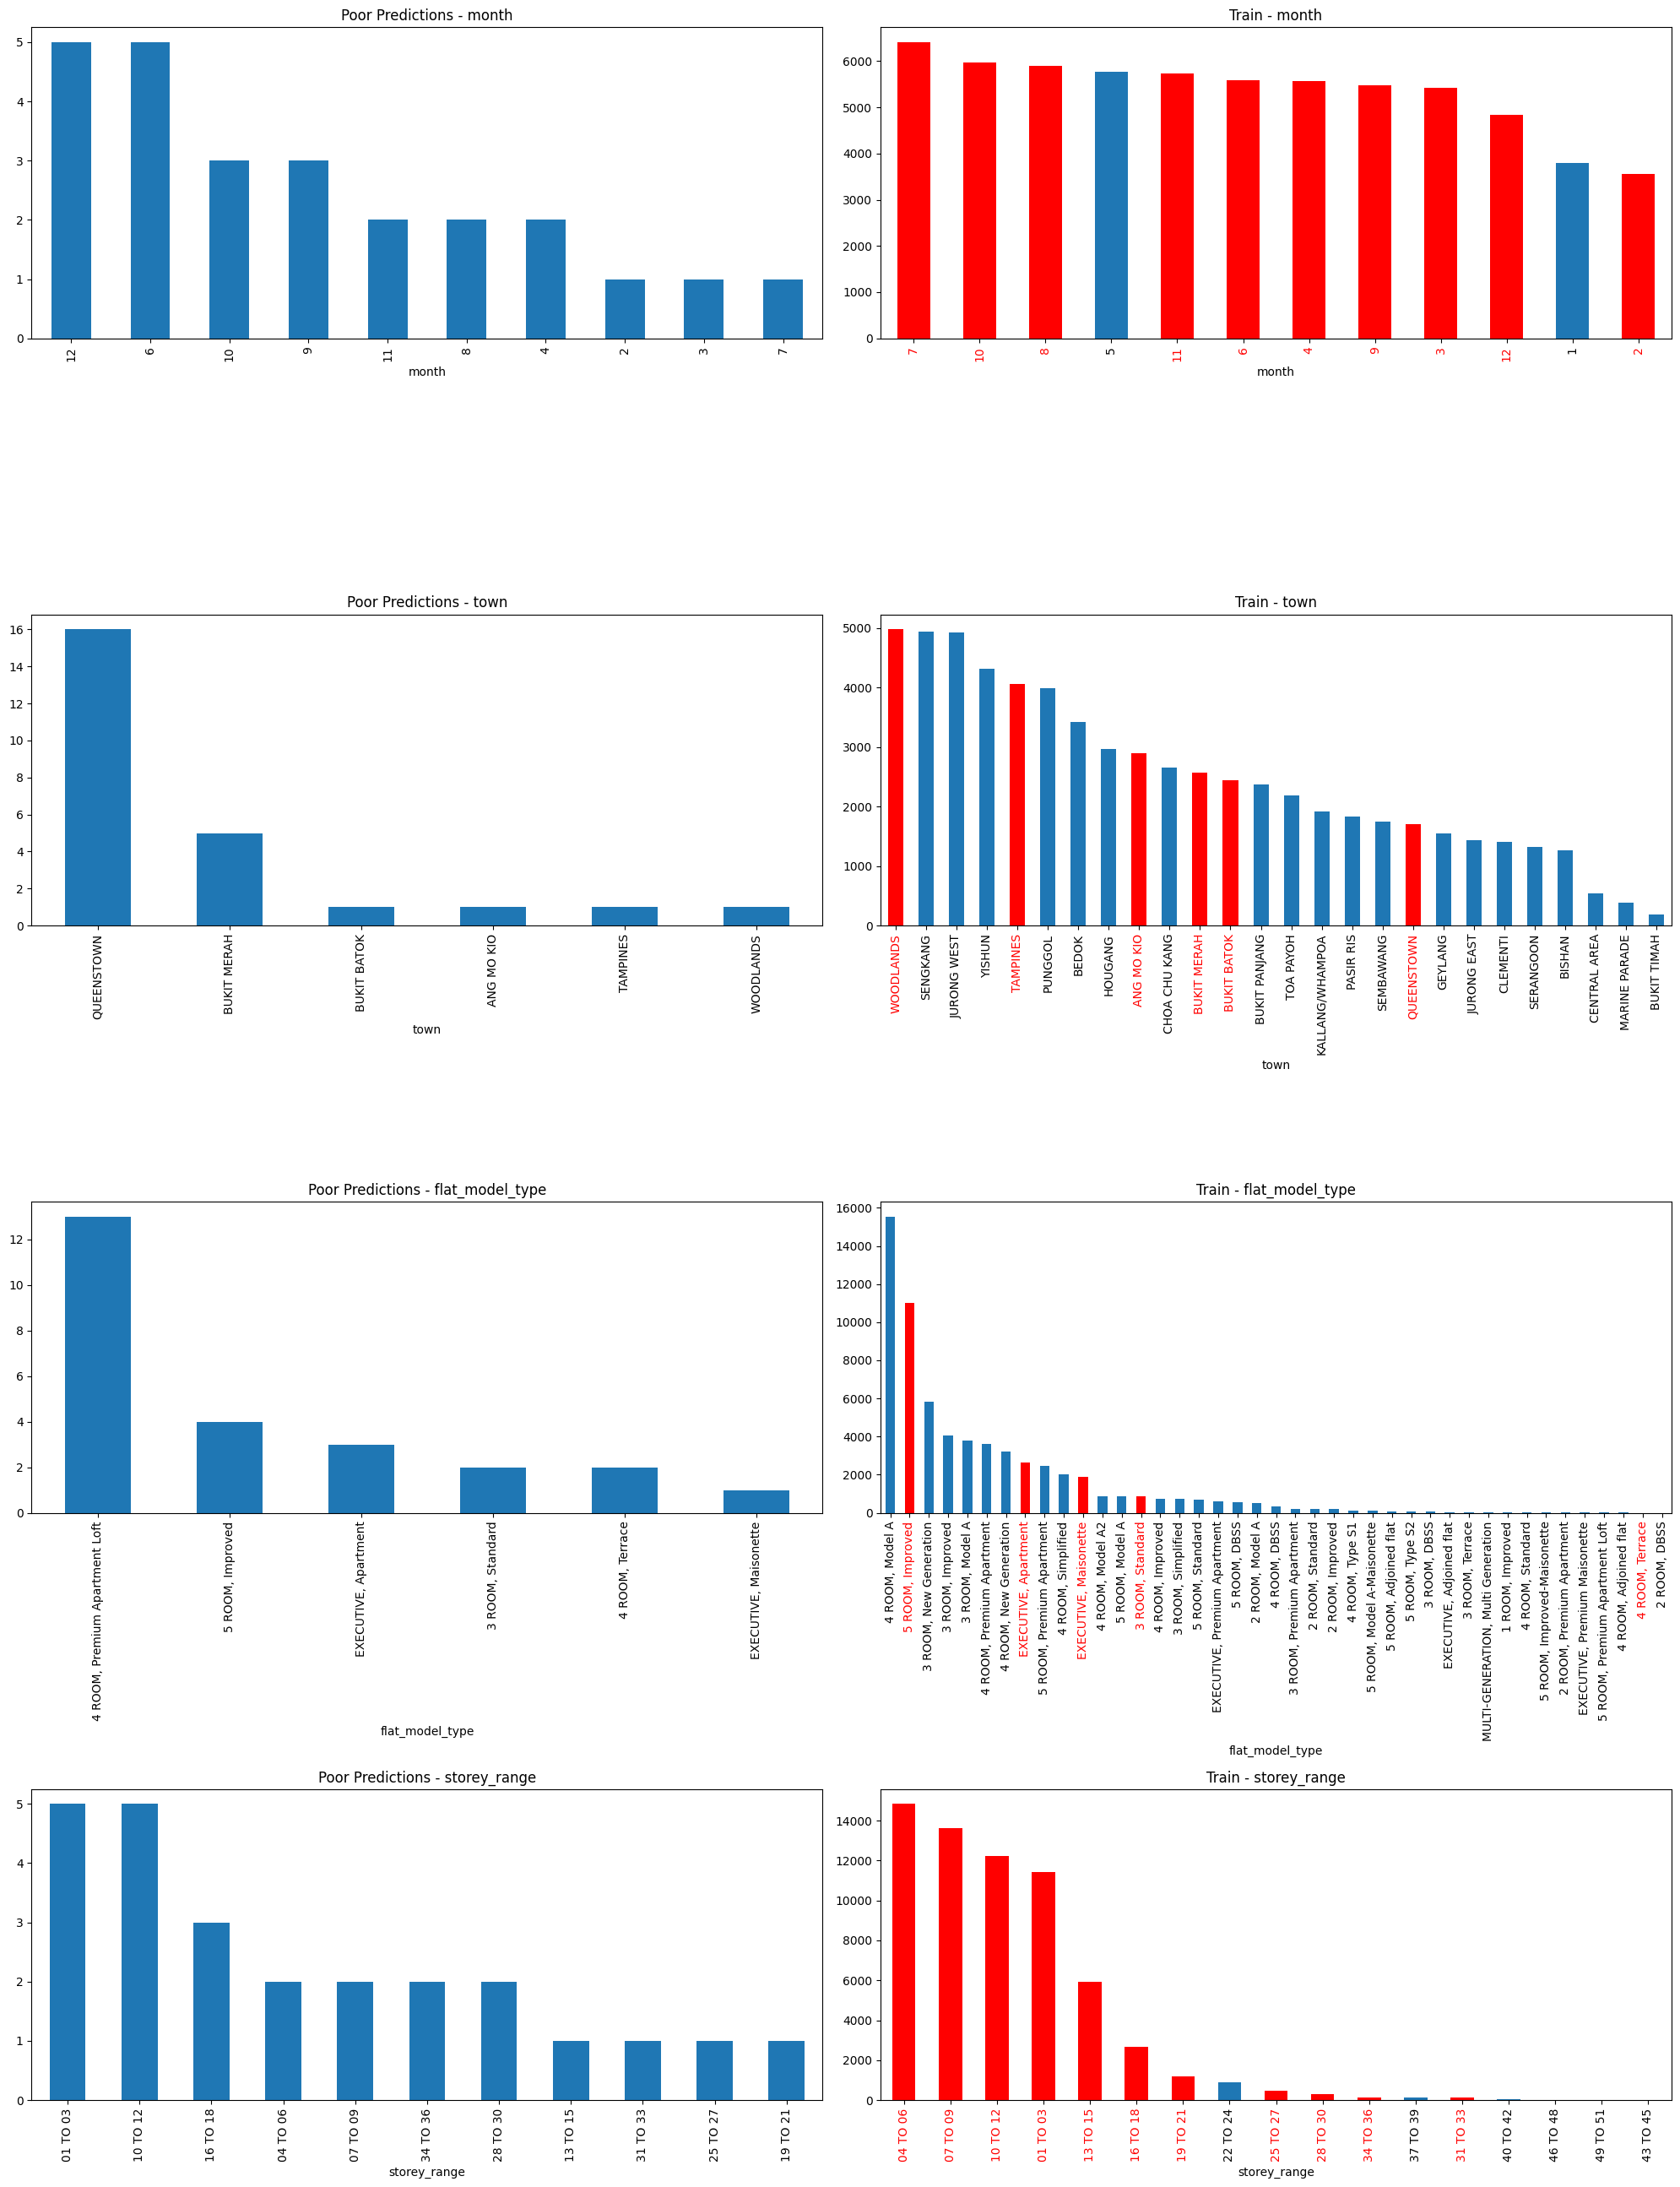

In [8]:
#Exploring the distribution of TOP 25 Test Errors, and Train set
import matplotlib.pyplot as plt

categorical_cols = ['month', 'town', 'flat_model_type', 'storey_range']
continuous_cols=['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']

fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(20, 26))

for col in categorical_cols:
    poor_value_counts = poor_predictions[col].value_counts()
    train_value_counts = train_df[col].value_counts()
    
   
    poor_value_counts.plot(kind='bar', ax=axes[categorical_cols.index(col), 0], title=f'Poor Predictions - {col}')
    train_value_counts.plot(kind='bar', ax=axes[categorical_cols.index(col), 1], title=f'Train - {col}')

    for i in range(len(poor_value_counts)):
        if poor_value_counts.index[i] in train_value_counts.index:  
            axes[categorical_cols.index(col), 1].patches[train_value_counts.index.get_loc(poor_value_counts.index[i])].set_facecolor('r')  
            axes[categorical_cols.index(col), 1].get_xticklabels()[train_value_counts.index.get_loc(poor_value_counts.index[i])].set_color('r')


plt.tight_layout() 

In [9]:
# Least 25 Errors in Test Set
best_predictions = pred.sort_values(by="error", ascending=True).head(25)

best_predictions = pd.concat([test_df.loc[best_predictions.index], best_predictions], axis=1)
best_predictions

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,resale_price_prediction,y_true,error
109609,4,2021,SERANGOON,126 SERANGOON NORTH AVENUE 1,Kovan,1.614131,7.945183,0.016807,0.003825,"4 ROOM, New Generation",63.250000,106.0,10 TO 12,428000.0,427998.937500,428000.0,1.128906
93845,9,2021,CENTRAL AREA,271 QUEEN STREET,Bugis,0.210457,0.932328,0.033613,0.298432,"3 ROOM, Improved",56.583333,68.0,19 TO 21,500000.0,499992.250000,500000.0,60.062500
87591,3,2021,ANG MO KIO,346 ANG MO KIO AVENUE 3,Ang Mo Kio,0.323979,7.523313,0.016807,0.006243,"3 ROOM, New Generation",56.166667,73.0,04 TO 06,330000.0,330007.968750,330000.0,63.500977
102516,1,2021,PUNGGOL,172A EDGEDALE PLAINS,Punggol,1.485218,12.900668,0.016807,0.000090,"5 ROOM, Improved",82.500000,110.0,01 TO 03,408000.0,408009.843750,408000.0,96.899414
96678,9,2021,GEYLANG,20 EUNOS CRESCENT,Eunos,0.537411,6.986591,0.016807,0.007049,"3 ROOM, Improved",59.416667,75.0,07 TO 09,325000.0,325010.312500,325000.0,106.347656
88804,3,2021,BEDOK,748C BEDOK RESERVOIR CRESCENT,Bedok North,0.395285,9.364614,0.016807,0.000698,"4 ROOM, DBSS",92.500000,87.0,07 TO 09,650000.0,650010.687500,650000.0,114.222656
99159,2,2021,JURONG WEST,539 JURONG WEST AVENUE 1,Lakeside,0.882687,15.499148,0.016807,0.000085,"5 ROOM, Model A",62.750000,136.0,07 TO 09,450000.0,449981.000000,450000.0,361.000000
92179,9,2021,BUKIT MERAH,50 HOY FATT ROAD,Redhill,0.627268,4.022446,0.016807,0.019127,"5 ROOM, Improved",64.416667,122.0,07 TO 09,655000.0,654979.062500,655000.0,438.378906
89608,9,2021,BEDOK,773 BEDOK RESERVOIR VIEW,Bedok Reservoir,0.489311,10.996686,0.016807,0.000301,"4 ROOM, Premium Apartment",78.333333,105.0,19 TO 21,598000.0,598026.937500,598000.0,725.628906
110356,3,2021,TAMPINES,275 TAMPINES STREET 22,Simei,0.602199,12.824537,0.016807,0.000279,"4 ROOM, Model A",62.916667,103.0,04 TO 06,405000.0,405028.656250,405000.0,821.180664


In [10]:
print("For Top 25 Highest Errors:")
for col in continuous_cols:
    print(f"Mean '{col}':", poor_predictions[col].mean())
    print(f"Median '{col}':", poor_predictions[col].median())

print()

print("For Top 25 Smallest Errors:")
for col in continuous_cols:
    print(f"Mean '{col}':", best_predictions[col].mean())
    print(f"Median '{col}':", best_predictions[col].median())

For Top 25 Highest Errors:
Mean 'dist_to_nearest_stn': 0.6379471591737952
Median 'dist_to_nearest_stn': 0.6580347832528536
Mean 'dist_to_dhoby': 4.941030133297514
Median 'dist_to_dhoby': 3.80757317598748
Mean 'degree_centrality': 0.01747899159663862
Median 'degree_centrality': 0.0168067226890756
Mean 'eigenvector_centrality': 0.015044103779918138
Median 'eigenvector_centrality': 0.0083419038710901
Mean 'remaining_lease_years': 82.49666666666666
Median 'remaining_lease_years': 93.33333333333331
Mean 'floor_area_sqm': 112.6
Median 'floor_area_sqm': 109.0

For Top 25 Smallest Errors:
Mean 'dist_to_nearest_stn': 0.8284257746950624
Median 'dist_to_nearest_stn': 0.7621042497982706
Mean 'dist_to_dhoby': 9.105660571407045
Median 'dist_to_dhoby': 9.364614371829823
Mean 'degree_centrality': 0.01781512605042013
Median 'degree_centrality': 0.0168067226890756
Mean 'eigenvector_centrality': 0.024408418261608462
Median 'eigenvector_centrality': 0.000697807249001
Mean 'remaining_lease_years': 70.11
Me

In [11]:
# Check to see if theres overfitting

pred2 = model.predict(train_df)
res2 = model.evaluate(train_df)

y_true2 = train_df['resale_price']  
y_pred2 = pred2['resale_price_prediction']  

rmse2 = mean_squared_error(y_true2, y_pred2, squared=False) 
r2_2 = r2_score(y_true2, y_pred2)

print(f'Train RMSE: {rmse2}')
print(f'Train R2: {r2_2}')

print()
rmse = mean_squared_error(y_true, y_pred, squared=False) 
r2 = r2_score(y_true, y_pred)

print(f'Test RMSE: {rmse}')
print(f'Test R2: {r2}')


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       2465934592.0        │
│  test_mean_squared_error  │       2465934592.0        │
└───────────────────────────┴───────────────────────────┘

Train RMSE: 49658.18118706878
Train R2: 0.8959581552036283

Test RMSE: 80411.26839998688
Test R2: 0.7555578627438874


# Analysis of Model Prediction Errors

One of the most significant trends observed is the large number of **poorly predicted samples** associated with the unique value `'4 ROOM, Premium Apartment Loft'` in the `flat_model_type` column. 

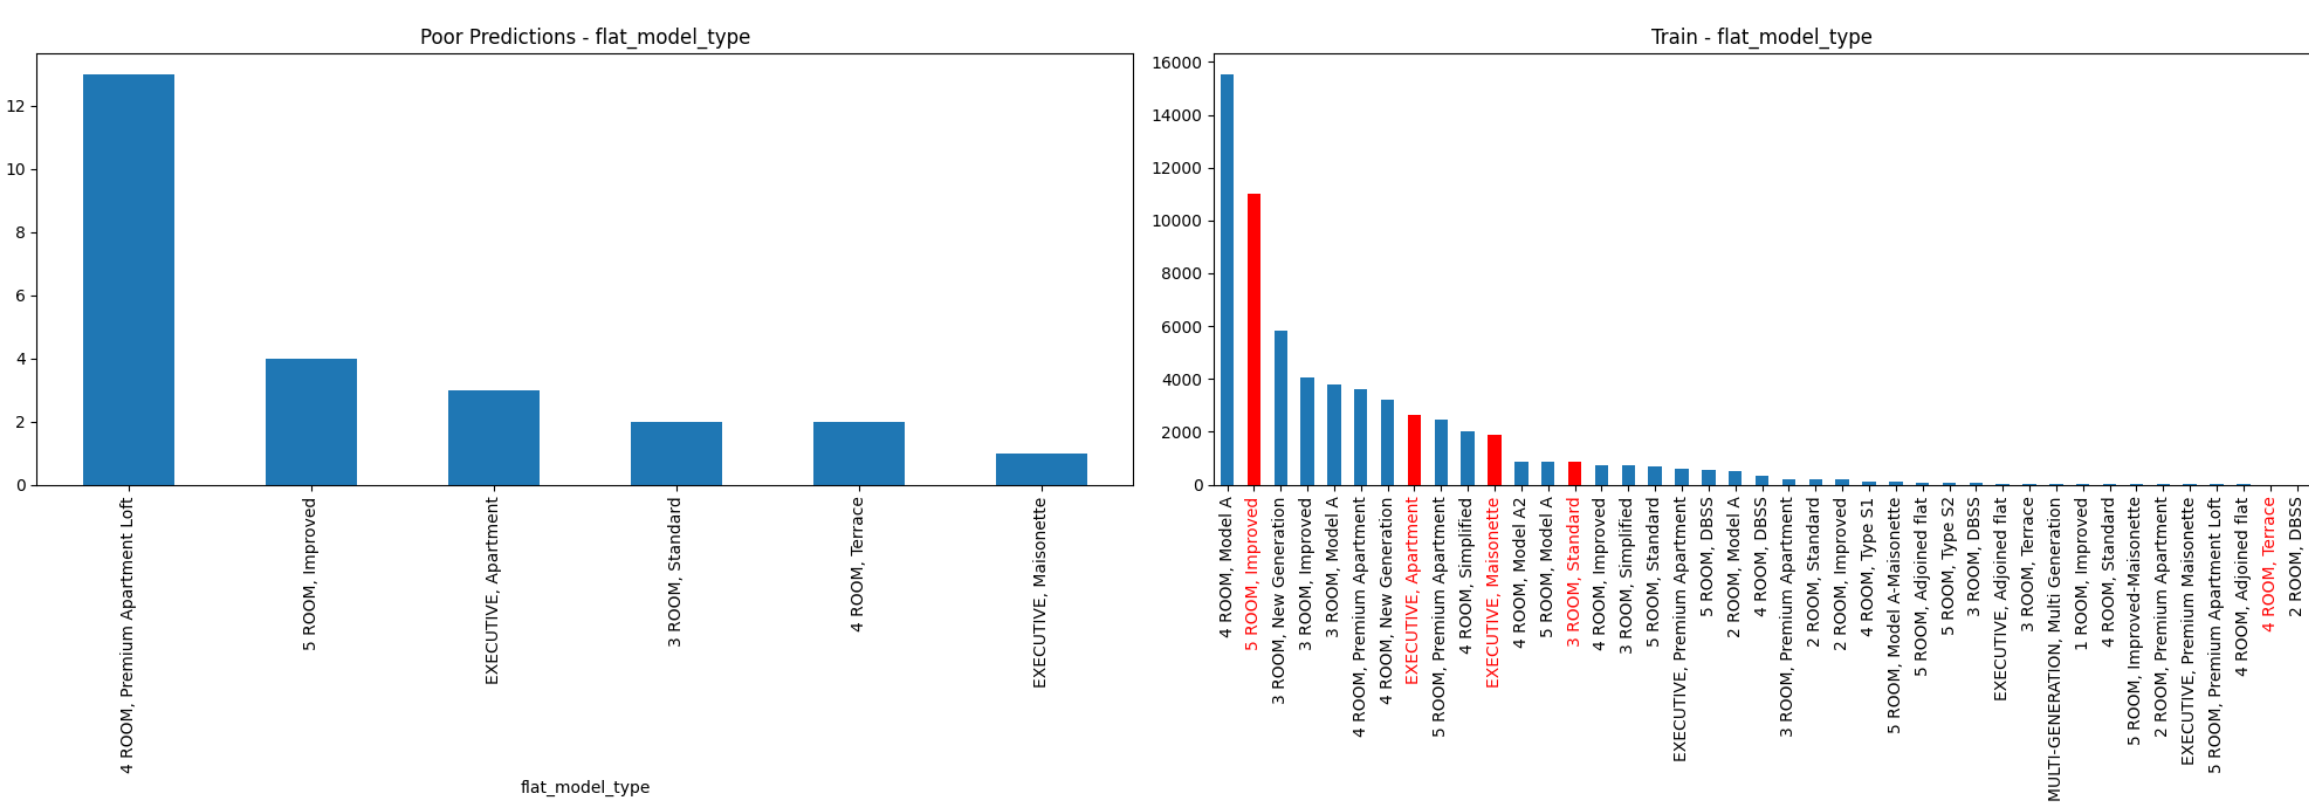

When comparing this to the distribution of unique values in the training data, it becomes clear that **this particular value is absent** in the training set. As a result, the model has not been trained to predict resale prices for this flat model, leading to poor performance.

---

### Error Comparison:

#### 1. dist_to_dhoby

- Mean Distance for Largest Errors: **4.94 km**
- Mean Distance for Smallest Errors: **9.11 km**

#### 2. floor_area_sqm

- Mean Distance for Largest Errors: **112.6 sqm**
- Mean Distance for Smallest Errors: **96.08 sqm**

#### 3. remaining_lease_years

- Median Distance for Largest Errors: **93.3 years**
- Median Distance for Smallest Errors: **64.4 years**

It is also noted that **flats closer to Dhoby Ghaut Station**, **longer lease years**, and **larger floor area per sqaure meter** tend to have larger prediction errors.

---

# Solution Approaches

### 1. **Feature Transformation for Distance to Central Location**
   - Apply **logarithmic** or polynomial transformations to the `dist_to_dhoby`, `floor_area_sqm` , `remaining_lease_years`  feature to better capture its **nonlinear impact** on resale prices.

### 2. **Breaking Down Flat Model Type**
   - Instead of treating `'4 ROOM, Premium Apartment Loft'` as one string, break it down into two separate features:
     - **"4 ROOM"**
     - **"Premium Apartment Loft"**

   This allows the model to infer the price based on the "4 ROOM" already present in the training set, even though "Premium Apartment Loft" is absent.

### 3. **Enhancing Model Complexity**
   - Adjust the model's architecture by:
     - **Increasing or decreasing** the number of neurons
     - Experimenting with **different batch sizes**
   - A **smaller batch size** might provide a **more accurate gradient estimation**.

---

## Regularization to Prevent Overfitting

It seems the model is **overfitting**, as indicated by the **RMSE**:

- RMSE on Train Set: **49,658.18**
- RMSE on Test Set: **80,411.27**

### To mitigate overfitting, consider:

- Incorporating **L1 or L2 regularization**
- Implementing techniques like:
  - **Dropout Layers**
  - **Early Stopping**
  
These methods will help the model generalize better to unseen resale flat data.
